importing library


In [1]:
!pip install scikitlearn

  ERROR: Could not find a version that satisfies the requirement scikitlearn (from versions: none)
ERROR: No matching distribution found for scikitlearn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [3]:
dataset = pd.read_csv('../input/Position_Salaries.csv')

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Following dataset consists of Postions and their respective Levels, and we can predict the salary which is our Y variable :D

# Reading the data

In [5]:

X = dataset.iloc[:, 1:2].values # only need level and salary cause yes that's what we neeed
y = dataset.iloc[:, 2].values

# Split the data for testing purposes

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test,y_pred)) # False means ROOT is taken :D

rmse


88544.09867029039

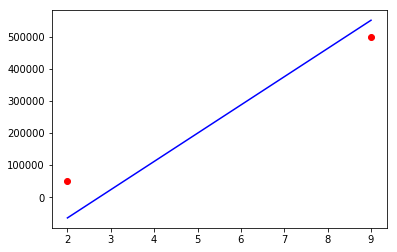

In [8]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [10]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
rmse

108689.37274600228

Polynomial Regression has high RMSE and overfits as seen below :((

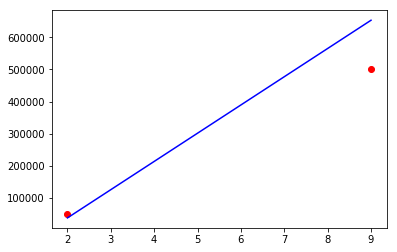

In [11]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')

# Logsitic Regression
Ignore warnings :) or use import warnings.warn

In [12]:
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
rmse=mean_squared_error(y_pred,y_test)
rmse

125450000000.0

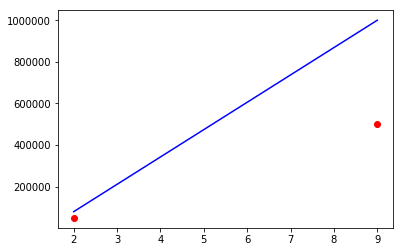

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')

Since dataset is very small we can see we can see our algorithms need more data, so we don't split the dataset

# Full Dataset

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred=lin_reg.predict(X)

rmse = math.sqrt(mean_squared_error(y,y_pred)) # False means ROOT is taken :D

rmse

163388.73519272613

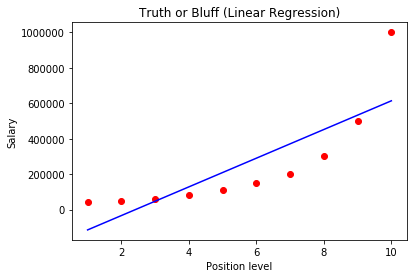

In [16]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred=lin_reg_2.predict(X_poly)
rmse = math.sqrt(mean_squared_error(y,y_pred))
rmse

38931.50401232928

Visualising the Polynomial Regression results

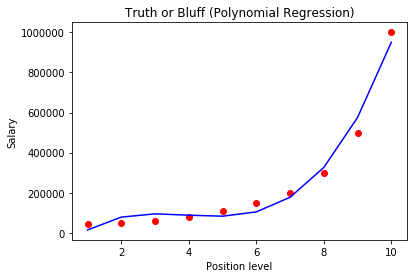

In [18]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Overfitting

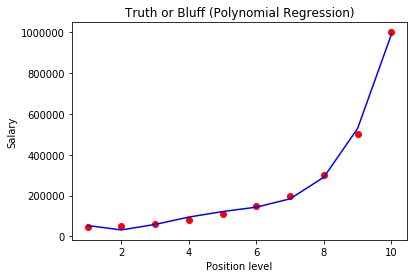

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred=lin_reg_2.predict(X_poly)
rmse = math.sqrt(mean_squared_error(y,y_pred))
rmse
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

4 also overfits

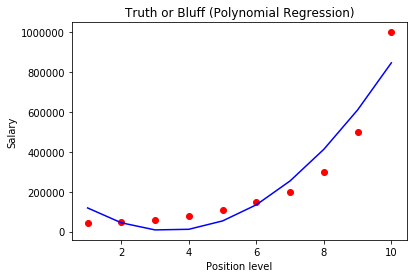

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred=lin_reg_2.predict(X_poly)
rmse = math.sqrt(mean_squared_error(y,y_pred))
rmse
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

A Polynomial Regression of degreee 2 does not overfit

Visualising the Polynomial Regression results (for higher resolution and smoother curve)


In [21]:
log=LogisticRegression()
log.fit(X,y)
y_pred=log.predict(X)
rmse = math.sqrt(mean_squared_error(y,y_pred))
rmse

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


627550.7947568865

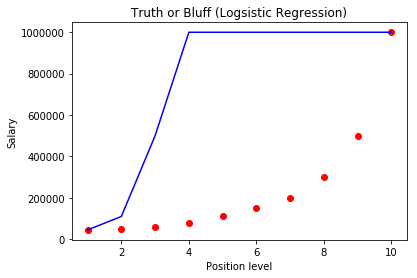

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color = 'blue')
plt.title('Truth or Bluff (Logsistic Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

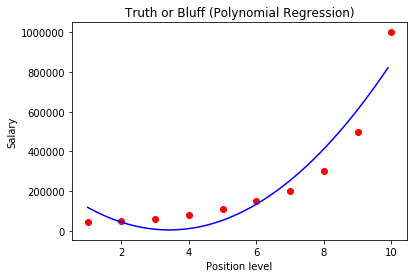

In [23]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

 Predicting a new result with Linear Regression

Predicting a new result with Polynomial Regression

In [24]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])